In [1]:
import pandas as pd
import random
import numpy as np
import pickle
import joblib # Often better for scikit-learn objects
import json

In [2]:
random.seed(42)
np.random.seed(42)


In [3]:
data = pd.read_csv("all_data.csv")
data.head()

,movie_id,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,...,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,link,distributor
0,tt0118589,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,...,997259.0,5271666.0,PG-13,1 hr 44 min,Drama,Music,Romance,NaN,https://www.boxofficemojo.com/title/tt0118589/...,NaN
1,tt0120630,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,...,118000000.0,224834564.0,NaN,1 hr 24 min,Adventure,Animation,Comedy,Drama,https://www.boxofficemojo.com/title/tt0120630/...,NaN
2,tt0120667,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,...,178839854.0,333535934.0,PG-13,1 hr 46 min,Action,Adventure,Family,Fantasy,https://www.boxofficemojo.com/title/tt0120667/...,NaN
3,tt0120679,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,...,30413474.0,56298474.0,R,2 hr 3 min,Biography,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0120679/...,NaN
4,tt0120681,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,...,42955549.0,74558115.0,R,2 hr 2 min,Horror,Mystery,Thriller,NaN,https://www.boxofficemojo.com/title/tt0120681/...,NaN


In [4]:
data.columns

Index(['movie_id', 'movie_title', 'movie_year', 'director', 'writer',
       'producer', 'composer', 'cinematographer', 'main_actor_1',
       'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget', 'domestic',
       'international', 'worldwide', 'mpaa', 'run_time', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'link', 'distributor'],
      dtype='object')

In [5]:
data['worldwide']

0         5271666.0
1       224834564.0
2       333535934.0
3        56298474.0
4        74558115.0
           ...     
5714     46890297.0
5715    309232797.0
5716     21051915.0
5717     68631669.0
5718     20311536.0
Name: worldwide, Length: 5719, dtype: float64

In [6]:
nan_data = (data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(24)

,column_name,percentage
21,genre_4,64.574226
23,distributor,43.556566
20,genre_3,30.914496
19,genre_2,8.078335
14,international,7.169086
16,mpaa,3.899283
7,cinematographer,3.567057
6,composer,3.112432
13,domestic,0.332226
5,producer,0.314740


In [7]:
data = data.dropna(subset=['worldwide'])

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
test_data.to_csv("test.csv", index=False)

In [9]:
train_movie_title = train_data['movie_title']
columns_to_drop = ['movie_id', 'movie_title', 'link']
#columns_to_drop = ['movie_id', 'link']
train_data = train_data.drop(columns=columns_to_drop)
train_data.head()

,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,...,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,distributor
4482,2008,Sanaa Hamri,Elizabeth Chandler,Debra Martin Chase,Rachel Portman,Jim Denault,America Ferrera,Alexis Bledel,Amber Tamblyn,Blake Lively,...,44089964.0,262453.0,44352417.0,PG-13,1 hr 59 min,Comedy,Drama,Romance,NaN,Warner Bros.
4803,2014,R.J. Cutler,Shauna Cross,Alison Greenspan,Heitor Pereira,John de Borman,Chloë Grace Moretz,Mireille Enos,Jamie Blackley,Joshua Leonard,...,50474843.0,27800000.0,78274843.0,PG-13,1 hr 47 min,Drama,Fantasy,Music,Romance,Warner Bros.
4890,2016,Sharon Maguire,Helen Fielding,Tim Bevan,Craig Armstrong,Andrew Dunn,Renée Zellweger,Gemma Jones,Jim Broadbent,Sally Phillips,...,24252420.0,187700000.0,211952420.0,R,2 hr 3 min,Comedy,Drama,Romance,NaN,Universal Pictures
5509,2016,Travis Knight,Marc Haimes,Travis Knight,Dario Marianelli,Frank Passingham,Charlize Theron,Art Parkinson,Matthew McConaughey,Ralph Fiennes,...,48023088.0,28226350.0,76249438.0,PG,1 hr 41 min,Action,Adventure,Animation,Family,Focus Features
2124,2015,Alfonso Gomez-Rejon,Jesse Andrews,Jeremy Dawson,Brian Eno,Chung-hoon Chung,Thomas Mann,RJ Cyler,Olivia Cooke,Nick Offerman,...,6758416.0,2316333.0,9074749.0,PG-13,1 hr 45 min,Comedy,Drama,Romance,NaN,NaN


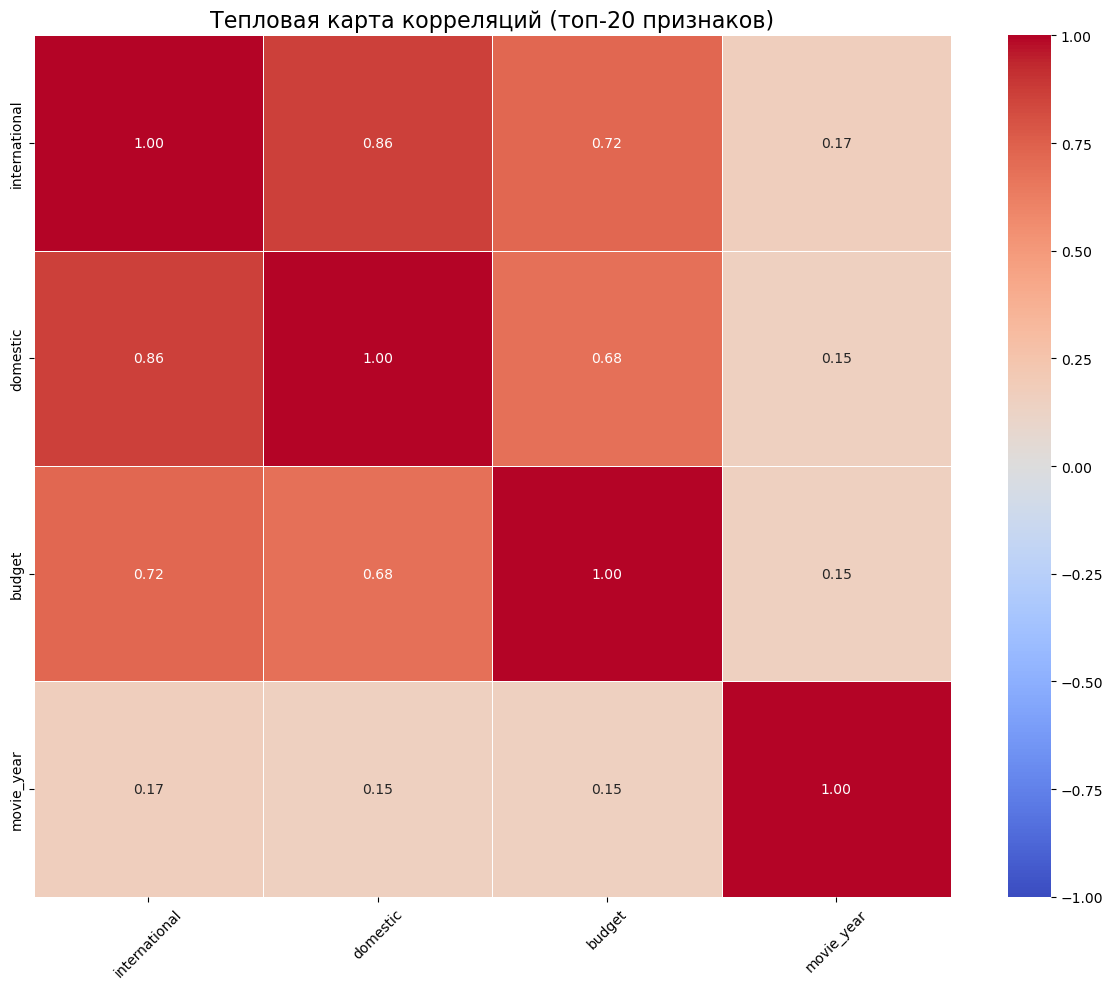

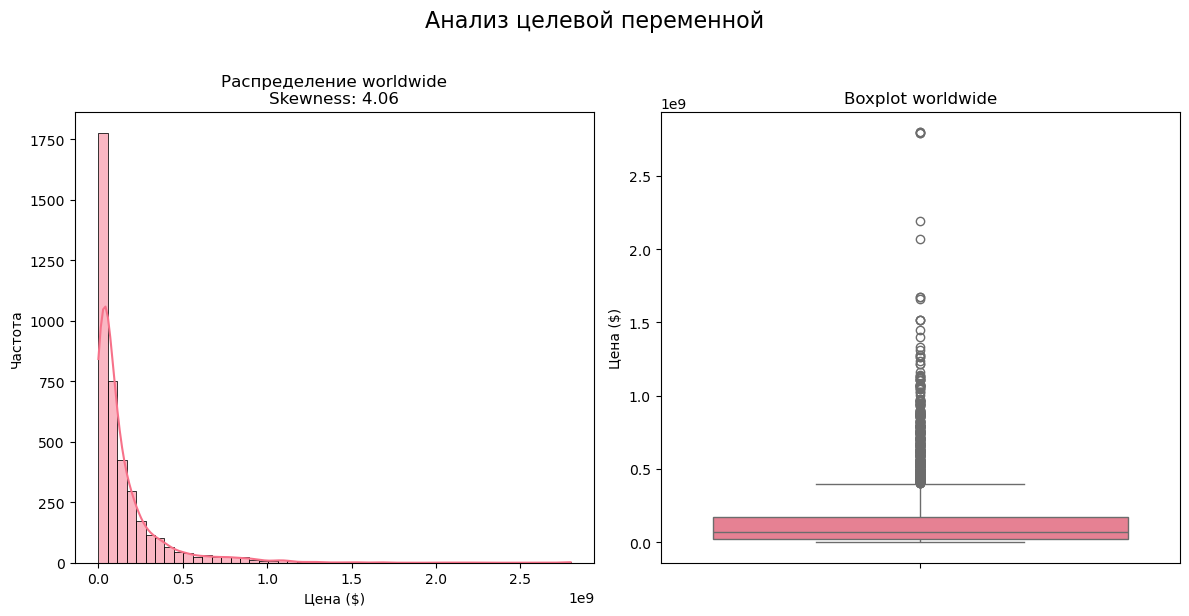

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# 1. Heatmap корреляций числовых признаков
# Выбираем только числовые колонки
numeric_cols = train_data.select_dtypes(include=[np.number]).columns

# Считаем корреляции и сортируем по целевой переменной
corr_matrix = train_data[numeric_cols].corr()
target_corr = corr_matrix['worldwide'].sort_values(ascending=False)

# Визуализируем топ-20 признаков по корреляции
plt.figure(figsize=(12, 10))
top_features = target_corr.index[1:21]  # исключаем сам worldwide
sns.heatmap(train_data[top_features].corr(), 
            annot=True, fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5)
plt.title('Тепловая карта корреляций (топ-20 признаков)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Распределение целевой переменной
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(train_data['worldwide'], kde=True, bins=50)
plt.title(f'Распределение worldwide\nSkewness: {train_data["worldwide"].skew():.2f}')
plt.xlabel('Цена ($)')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['worldwide'])
plt.title('Boxplot worldwide')
plt.ylabel('Цена ($)')

plt.suptitle('Анализ целевой переменной', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
for col in ["director", "writer", "producer", "composer", "cinematographer"]:
    counts = train_data[col].value_counts()
    train_data[f"{col}_experience"] = train_data[col].map(counts)

# опыт главных актёров и суммарная "звёздность"
for i in range(1, 5):
    col = f"main_actor_{i}"
    counts = train_data[col].value_counts()
    train_data[f"{col}_experience"] = train_data[col].map(counts)
train_data["cast_popularity"] = sum(train_data[f"main_actor_{i}_experience"] for i in range(1, 5))

In [12]:
import re

def convert_runtime_to_minutes(value):
    match = re.match(r'(?:(\d+)\s*hr)?\s*(?:(\d+)\s*min)?', str(value))
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None  # если формат не распознан

train_data['run_time'] = train_data['run_time'].apply(convert_runtime_to_minutes)


In [13]:
from sklearn.impute import SimpleImputer

num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
train_data[num_cols] = num_imputer.fit_transform(train_data[num_cols])

In [14]:
'''from sklearn.impute import SimpleImputer

num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
train_data[num_cols] = imputer.fit_transform(train_data[num_cols])
train_data.head()'''

"from sklearn.impute import SimpleImputer\n\nnum_cols = train_data.select_dtypes(include=['int64', 'float64']).columns\nimputer = SimpleImputer(strategy='mean')\ntrain_data[num_cols] = imputer.fit_transform(train_data[num_cols])\ntrain_data.head()"

In [15]:
train_data['director']

4482            Sanaa Hamri
4803            R.J. Cutler
4890         Sharon Maguire
5509          Travis Knight
2124    Alfonso Gomez-Rejon
               ...         
3774           David Zucker
5197            Matt Reeves
5232             Shawn Levy
5396         Leigh Whannell
860        Scott Derrickson
Name: director, Length: 3998, dtype: object

In [16]:
nan_data = (train_data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(24)

,column_name,percentage
19,genre_4,64.532266
20,distributor,42.921461
18,genre_3,31.015508
17,genre_2,8.054027
14,mpaa,3.851926
5,cinematographer,3.526763
4,composer,3.226613
3,producer,0.275138
2,writer,0.175088
9,main_actor_4,0.075038


In [17]:
genre_cols = ["genre_1", "genre_2", "genre_3", "genre_4"]
# число жанров
'''train_data["num_genres"] = train_data[genre_cols].notna().sum(axis=1)
genres = train_data[genre_cols].apply(lambda row: [g for g in row if pd.notna(g)], axis=1)
family_genres = {"Animation", "Family", "Adventure"}
train_data["is_family_friendly"] = genres.apply(lambda gl: int(bool(set(gl) & family_genres)))
'''

'train_data["num_genres"] = train_data[genre_cols].notna().sum(axis=1)\ngenres = train_data[genre_cols].apply(lambda row: [g for g in row if pd.notna(g)], axis=1)\nfamily_genres = {"Animation", "Family", "Adventure"}\ntrain_data["is_family_friendly"] = genres.apply(lambda gl: int(bool(set(gl) & family_genres)))\n'

In [18]:
cols_to_fill = ['cinematographer', 'composer', 'producer', 'writer']

for col in cols_to_fill:
    # Группировка по distributor и заполнение пропусков модой по группе
    train_data[col] = train_data.groupby('director')[col]\
        .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [19]:
columns_to_fill = ['genre_2', 'genre_3', 'genre_4', 'main_actor_4']
train_data[columns_to_fill] = train_data[columns_to_fill].fillna('Unknown')


In [20]:
cat_cols = train_data.select_dtypes(include=['object']).columns

cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[cat_cols] = cat_imputer.fit_transform(train_data[cat_cols])

In [21]:
nan_data = (train_data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(24)

,column_name,percentage
0,movie_year,0.0
16,genre_1,0.0
29,main_actor_4_experience,0.0
28,main_actor_3_experience,0.0
27,main_actor_2_experience,0.0
26,main_actor_1_experience,0.0
25,cinematographer_experience,0.0
24,composer_experience,0.0
23,producer_experience,0.0
22,writer_experience,0.0


In [22]:
train_data['run_time']

4482    119.0
4803    107.0
4890    123.0
5509    101.0
2124    105.0
        ...  
3774     83.0
5197    130.0
5232    119.0
5396     97.0
860     119.0
Name: run_time, Length: 3998, dtype: float64

In [23]:
train_data.head()

,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,...,director_experience,writer_experience,producer_experience,composer_experience,cinematographer_experience,main_actor_1_experience,main_actor_2_experience,main_actor_3_experience,main_actor_4_experience,cast_popularity
4482,2008.0,Sanaa Hamri,Elizabeth Chandler,Debra Martin Chase,Rachel Portman,Jim Denault,America Ferrera,Alexis Bledel,Amber Tamblyn,Blake Lively,...,1.0,1.0,7.0,22.0,13.0,1.0,3.0,1.0,3.0,8.0
4803,2014.0,R.J. Cutler,Shauna Cross,Alison Greenspan,Heitor Pereira,John de Borman,Chloë Grace Moretz,Mireille Enos,Jamie Blackley,Joshua Leonard,...,1.0,2.0,1.0,15.0,10.0,5.0,1.0,1.0,1.0,8.0
4890,2016.0,Sharon Maguire,Helen Fielding,Tim Bevan,Craig Armstrong,Andrew Dunn,Renée Zellweger,Gemma Jones,Jim Broadbent,Sally Phillips,...,3.0,5.0,43.0,26.0,22.0,7.0,2.0,3.0,2.0,14.0
5509,2016.0,Travis Knight,Marc Haimes,Travis Knight,Dario Marianelli,Frank Passingham,Charlize Theron,Art Parkinson,Matthew McConaughey,Ralph Fiennes,...,1.0,1.0,2.0,10.0,3.0,13.0,1.0,1.0,6.0,21.0
2124,2015.0,Alfonso Gomez-Rejon,Jesse Andrews,Jeremy Dawson,Brian Eno,Chung-hoon Chung,Thomas Mann,RJ Cyler,Olivia Cooke,Nick Offerman,...,2.0,4.0,2.0,3.0,6.0,2.0,2.0,2.0,4.0,10.0


In [24]:
'''import re

def convert_runtime_to_minutes(value):
    match = re.match(r'(?:(\d+)\s*hr)?\s*(?:(\d+)\s*min)?', str(value))
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None  # если формат не распознан

train_data['run_time'] = train_data['run_time'].apply(convert_runtime_to_minutes)
train_data.head()
'''

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_68135/2047955137.py:1: SyntaxWarning: invalid escape sequence '\d'
  '''import re


"import re\n\ndef convert_runtime_to_minutes(value):\n    match = re.match(r'(?:(\\d+)\\s*hr)?\\s*(?:(\\d+)\\s*min)?', str(value))\n    if match:\n        hours = int(match.group(1)) if match.group(1) else 0\n        minutes = int(match.group(2)) if match.group(2) else 0\n        return hours * 60 + minutes\n    return None  # если формат не распознан\n\ntrain_data['run_time'] = train_data['run_time'].apply(convert_runtime_to_minutes)\ntrain_data.head()\n"

In [25]:
# Вывод столбцов и колисество значений с ними
cat_cols = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

cat_stats = pd.DataFrame({
    'Column': cat_cols,
    'Unique_Count': [train_data[col].nunique() for col in cat_cols],
    'Unique_Values': [train_data[col].unique() for col in cat_cols]
})

cat_stats = cat_stats.sort_values(by='Unique_Count', ascending=False)
print(cat_stats[['Column', 'Unique_Count']])

             Column  Unique_Count
8      main_actor_4          2136
7      main_actor_3          1898
1            writer          1863
6      main_actor_2          1564
2          producer          1385
0          director          1380
5      main_actor_1          1173
4   cinematographer           787
3          composer           713
14      distributor           165
11          genre_2            21
12          genre_3            21
13          genre_4            18
10          genre_1            15
9              mpaa             5


In [26]:
columns_for_target_encoding = ['main_actor_4', 'main_actor_3', 'writer', 'main_actor_2', 'producer', 'director', 'main_actor_1', 'cinematographer', 'composer', 'distributor']
columns_for_one_hot = ['genre_2', 'genre_3', 'genre_4', 'genre_1', 'mpaa']

In [27]:
train_data = pd.get_dummies(train_data, columns=columns_for_one_hot)
train_data.columns

Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4',
       ...
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Mystery', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'mpaa_G', 'mpaa_NC-17', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R'],
      dtype='object', length=106)

In [28]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=columns_for_target_encoding)
train_data_encoded = encoder.fit_transform(train_data[columns_for_target_encoding], train_data['worldwide'])
train_data[columns_for_target_encoding] = train_data_encoded

In [29]:
train_data.head()

,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,...,genre_1_Horror,genre_1_Music,genre_1_Mystery,genre_1_Romance,genre_1_Sci-Fi,mpaa_G,mpaa_NC-17,mpaa_PG,mpaa_PG-13,mpaa_R
4482,2008.0,1.345182e+08,1.345182e+08,1.348617e+08,1.045484e+08,1.248082e+08,1.345182e+08,1.317527e+08,1.345182e+08,1.317527e+08,...,False,False,False,False,False,False,False,False,True,False
4803,2014.0,1.389318e+08,1.337451e+08,1.389318e+08,2.625639e+08,1.309102e+08,1.380674e+08,1.389318e+08,1.389318e+08,1.389318e+08,...,False,False,False,False,False,False,False,False,True,False
4890,2016.0,1.614849e+08,1.661032e+08,1.295603e+08,1.379337e+08,1.316244e+08,1.558859e+08,1.570753e+08,1.506852e+08,1.570753e+08,...,False,False,False,False,False,False,False,False,False,True
5509,2016.0,1.386682e+08,1.386682e+08,1.400165e+08,1.417198e+08,1.417403e+08,1.161474e+08,1.386682e+08,1.386682e+08,1.559626e+08,...,False,False,False,False,False,False,False,True,False,False
2124,2015.0,1.282969e+08,1.247797e+08,1.282969e+08,1.308975e+08,1.700476e+08,1.282969e+08,1.282969e+08,1.282969e+08,1.517334e+08,...,False,False,False,False,False,False,False,False,True,False


In [30]:
X = train_data.drop("worldwide", axis=1)
y = train_data["worldwide"]
#y = np.log1p(train_data["worldwide"])

In [31]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler, QuantileTransformer, PowerTransformer
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sklearn
import xgboost
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
print(f"scikit-learn version: {sklearn.__version__}")
print(f"xgboost version: {xgboost.__version__}")
'''model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"R²: {r2_score(y_val, y_pred):.4f}") #R²: 0.9981
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}")#MSE: 73899943426108.95'''



'''rf = RandomForestRegressor(random_state=42)

# Сетка гиперпараметров
param_grid = {
    'n_estimators': [100, 1000],           # Кол-во деревьев
    'max_depth': [10, 50, None],          # Максимальная глубина
    'min_samples_split': [2, 10],          # Мин. объектов для разделения
    'min_samples_leaf': [1, 5],           # Мин. объектов в листе
    'max_features': ['auto', 'sqrt']      # Кол-во признаков при делении
}

# GridSearch с кросс-валидацией
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Предсказания и метрики
y_pred = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Test R² Score: {r2:.4f}") # Test R² Score: 0.9801
print(f"Test MSE: {mse:.2f}") #Test MSE: 756709767970853.50'''



'''from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"R²: {r2_score(y_val, y_pred):.4f}")#R²: 0.9984
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}")#MSE: 61650183675109.39'''



'''from lightgbm import LGBMRegressor

model = LGBMRegressor(n_estimators=1000, learning_rate=0.21, max_depth=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"R²: {r2_score(y_val, y_pred):.4f}") # R²: 0.9953
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}") #MSE: 180661829545789.47'''



'''from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"R²: {r2_score(y_val, y_pred):.4f}") # MSE: 145843899870827.59
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}") # R²: 0.9962'''



param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth':    [4, 6, 8],
    'learning_rate':[0.01, 0.05, 0.1],
    'subsample':    [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha':    [0, 0.5, 1],
    'reg_lambda':   [1, 2, 5]
}

# 4) Создаём XGB с фиксированным seed и детерминированным методом
base_model = XGBRegressor(
    random_state=42,
    tree_method='hist',            # более детерминированный
    enable_categorical=False,
    n_jobs=1
)

# 5) RandomizedSearchCV с фиксированным seed
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=1,              # лучше 1, чтобы исключить недетерминированность
    random_state=42
)

# 6) Обучаем
random_search.fit(X_train, y_train)

# 7) Оцениваем
best = random_search.best_estimator_
y_pred = best.predict(X_val)
print(f"R²:  {r2_score(y_val, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}")
#Best Params: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
#Best R² Score on Test: 0.9990
#Best MSE on Test: 37542782216082.52

#Best R² Score on Test: 0.9990
#Best MSE on Test: 36496695202244.70

#Best R² Score on Test: 0.9991
#Best MSE on Test: 32663862493933.65


#R²:  0.9993
#MSE: 28215564467164.59


'''param_dist = {
    'iterations': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'random_strength': [0.5, 1, 2]
}

# Создаём модель
cat = CatBoostRegressor(verbose=0, random_seed=42)

# RandomizedSearch
random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение
random_search.fit(X_train, y_train)

# Лучшая модель
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Предсказания и метрики
y_pred = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Best R²: {r2:.4f}")
print(f"Best MSE: {mse:.2f}")
#Best Parameters: {'subsample': 0.8, 'random_strength': 0.5, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 6}
#Best R²: 0.9978
#Best MSE: 83318573388615.64 '''




'''param_dist = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 4, 6, 8, 10],
    'num_leaves': [31, 50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Модель
lgb = LGBMRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение
random_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Предсказание и метрики
y_pred = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Best R²: {r2:.4f}")
print(f"Best MSE: {mse:.2f}")
#Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'num_leaves': 31, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
#Best R²: 0.9959
#Best MSE: 157899903576786.03'''


scikit-learn version: 1.6.1
xgboost version: 3.0.1
Fitting 3 folds for each of 20 candidates, totalling 60 fits
R²:  0.9991
MSE: 35013387003236.93


'param_dist = {\n    \'n_estimators\': [200, 500, 1000],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'max_depth\': [-1, 4, 6, 8, 10],\n    \'num_leaves\': [31, 50, 100, 150],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'reg_alpha\': [0, 0.1, 1],\n    \'reg_lambda\': [0, 0.1, 1]\n}\n\n# Модель\nlgb = LGBMRegressor(random_state=42)\n\n# Randomized Search\nrandom_search = RandomizedSearchCV(\n    estimator=lgb,\n    param_distributions=param_dist,\n    n_iter=20,\n    scoring=\'neg_mean_squared_error\',\n    cv=3,\n    verbose=1,\n    n_jobs=-1\n)\n\n# Обучение\nrandom_search.fit(X_train, y_train)\n\n# Лучшая модель и параметры\nbest_model = random_search.best_estimator_\nprint("Best Parameters:", random_search.best_params_)\n\n# Предсказание и метрики\ny_pred = best_model.predict(X_val)\nr2 = r2_score(y_val, y_pred)\nmse = mean_squared_error(y_val, y_pred)\n\nprint(f"Best R²: {r2:.4f}")\nprint(f"Best MSE: {mse:.2f}")\n#Best Parameters:

In [34]:
'''param_dist = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 4, 6, 8, 10],
    'num_leaves': [31, 50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Модель
lgb = LGBMRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение
random_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Предсказание и метрики
y_pred = best_model.predict(X_val)# Обратное преобразование: экспоненцируем предсказания
y_pred_original = np.expm1(y_pred)  # Возвращаем обратно в исходный масштаб

# Метрики
r2 = r2_score(np.expm1(y_val), y_pred_original)  # Обратно логарифмируем y_val для расчета метрик
mse = mean_squared_error(np.expm1(y_val), y_pred_original)
print(f"Best R²: {r2:.4f}")
print(f"Best MSE: {mse:.2f}")
#Best R²: 0.9981
#Best MSE: 73636379429094.73'''




'''param_dist = {
    'iterations': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'random_strength': [0.5, 1, 2]
}

# Создаём модель
cat = CatBoostRegressor(verbose=0, random_seed=42)

# RandomizedSearch
random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение
random_search.fit(X_train, y_train)

# Лучшая модель
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Предсказания и метрики
y_pred = best_model.predict(X_val)
y_pred_original = np.expm1(y_pred)  # Возвращаем обратно в исходный масштаб

# Метрики
r2 = r2_score(np.expm1(y_val), y_pred_original)  # Обратно логарифмируем y_val для расчета метрик
mse = mean_squared_error(np.expm1(y_val), y_pred_original)

print(f"Best R²: {r2:.4f}")
print(f"Best MSE: {mse:.2f}")
#Best R²: 0.9934
#Best MSE: 252026444906922.81'''



'''param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 2, 5]
}

random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
from sklearn.metrics import r2_score, mean_squared_error

# Лучшая модель из RandomizedSearchCV
best_model = random_search.best_estimator_

# Предсказания на тестовой выборке
y_pred = best_model.predict(X_val)
y_pred_original = np.expm1(y_pred)  # Возвращаем обратно в исходный масштаб

# Метрики
r2 = r2_score(np.expm1(y_val), y_pred_original)  # Обратно логарифмируем y_val для расчета метрик
mse = mean_squared_error(np.expm1(y_val), y_pred_original)

print(f"Best R² Score on Test: {r2:.4f}")
print(f"Best MSE on Test: {mse:.2f}")
#Best R² Score on Test: 0.9975
#Best MSE on Test: 95385734348795.59'''





'''rf = RandomForestRegressor(random_state=42)

# Сетка гиперпараметров
param_grid = {
    'n_estimators': [100, 1000],           # Кол-во деревьев
    'max_depth': [10, 50, None],          # Максимальная глубина
    'min_samples_split': [2, 10],          # Мин. объектов для разделения
    'min_samples_leaf': [1, 5],           # Мин. объектов в листе
    'max_features': ['auto', 'sqrt']      # Кол-во признаков при делении
}

# GridSearch с кросс-валидацией
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Предсказания и метрики
y_pred = best_model.predict(X_val)
y_pred_original = np.expm1(y_pred)  # Возвращаем обратно в исходный масштаб

# Метрики
r2 = r2_score(np.expm1(y_val), y_pred_original)  # Обратно логарифмируем y_val для расчета метрик
mse = mean_squared_error(np.expm1(y_val), y_pred_original)

print(f"Test R² Score: {r2:.4f}")
print(f"Test MSE: {mse:.2f}") 
#Test R² Score: 0.9648
#Test MSE: 1341694408103681.00'''




'rf = RandomForestRegressor(random_state=42)\n\n# Сетка гиперпараметров\nparam_grid = {\n    \'n_estimators\': [100, 1000],           # Кол-во деревьев\n    \'max_depth\': [10, 50, None],          # Максимальная глубина\n    \'min_samples_split\': [2, 10],          # Мин. объектов для разделения\n    \'min_samples_leaf\': [1, 5],           # Мин. объектов в листе\n    \'max_features\': [\'auto\', \'sqrt\']      # Кол-во признаков при делении\n}\n\n# GridSearch с кросс-валидацией\ngrid_search = GridSearchCV(estimator=rf,\n                           param_grid=param_grid,\n                           cv=3,\n                           scoring=\'r2\',\n                           n_jobs=-1,\n                           verbose=1)\n\n# Обучение модели\ngrid_search.fit(X_train, y_train)\n\n# Лучшая модель и параметры\nbest_model = grid_search.best_estimator_\nprint("Best parameters:", grid_search.best_params_)\n\n# Предсказания и метрики\ny_pred = best_model.predict(X_val)\ny_pred_original = np

TEST DATA

In [35]:
test_data = pd.read_csv('test.csv')

In [36]:
test_movie_title = test_data['movie_title']
columns_to_drop = ['movie_id', 'movie_title', 'link']
#columns_to_drop = ['movie_id', 'link']
test_data = test_data.drop(columns=columns_to_drop)

In [37]:
for col in ["director", "writer", "producer", "composer", "cinematographer"]:
    counts = train_data[col].value_counts()
    test_data[f"{col}_experience"] = test_data[col].map(counts).fillna(0)
for i in range(1, 5):
    col = f"main_actor_{i}"
    counts = train_data[col].value_counts()
    test_data[f"{col}_experience"] = test_data[col].map(counts).fillna(0)

test_data["cast_popularity"] = sum(test_data[f"main_actor_{i}_experience"] for i in range(1, 5))
test_data.head()

,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,...,director_experience,writer_experience,producer_experience,composer_experience,cinematographer_experience,main_actor_1_experience,main_actor_2_experience,main_actor_3_experience,main_actor_4_experience,cast_popularity
0,2012,Peter Ramsey,David Lindsay-Abaire,Nancy Bernstein,Alexandre Desplat,NaN,Hugh Jackman,Alec Baldwin,Isla Fisher,Chris Pine,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,Rob Cohen,Ken Li,Neal H. Moritz,BT,Ericson Core,Vin Diesel,Paul Walker,Michelle Rodriguez,Jordana Brewster,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003,Sam Weisman,Fred Wolf,Jack Giarraputo,Christophe Beck,Thomas E. Ackerman,David Spade,Mary McCormack,Alyssa Milano,Craig Bierko,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,Tim Burton,Ehren Kruger,Katterli Frauenfelder,Danny Elfman,Ben Davis,Colin Farrell,Michael Keaton,Danny DeVito,Eva Green,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,Shane Black,Fred Dekker,John Davis,Henry Jackman,Larry Fong,Boyd Holbrook,Trevante Rhodes,Jacob Tremblay,Keegan-Michael Key,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def convert_runtime_to_minutes(value):
    match = re.match(r'(?:(\d+)\s*hr)?\s*(?:(\d+)\s*min)?', str(value))
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None  # если формат не распознан

test_data['run_time'] = test_data['run_time'].apply(convert_runtime_to_minutes)

In [39]:
test_num_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
test_data[test_num_cols] = num_imputer.transform(test_data[test_num_cols])

In [40]:
cols_to_fill = ['cinematographer', 'composer', 'producer', 'writer']

for col in cols_to_fill:
    mode_values = train_data.groupby('director')[col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    test_data[col] = test_data.apply(lambda row: mode_values.get(row['director'], np.nan) if pd.isnull(row[col]) else row[col], axis=1)


In [41]:
columns_to_fill = ['genre_2', 'genre_3', 'genre_4', 'main_actor_4']
test_data[columns_to_fill] = test_data[columns_to_fill].fillna('Unknown')

cat_cols = test_data.select_dtypes(include=['object']).columns

test_data[cat_cols] = cat_imputer.fit_transform(test_data[cat_cols])

In [42]:
nan_data = (test_data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(24)

,column_name,percentage
0,movie_year,0.0
16,genre_1,0.0
29,main_actor_4_experience,0.0
28,main_actor_3_experience,0.0
27,main_actor_2_experience,0.0
26,main_actor_1_experience,0.0
25,cinematographer_experience,0.0
24,composer_experience,0.0
23,producer_experience,0.0
22,writer_experience,0.0


In [43]:
test_data = pd.get_dummies(test_data, columns=columns_for_one_hot)
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)


In [44]:
test_data_encoded = encoder.fit_transform(test_data[columns_for_target_encoding], test_data['worldwide'])
test_data[columns_for_target_encoding] = test_data_encoded

In [45]:
X_test =test_data.drop("worldwide", axis=1)
y_test = test_data["worldwide"]

In [46]:
train_data.columns

Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4',
       ...
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Mystery', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'mpaa_G', 'mpaa_NC-17', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R'],
      dtype='object', length=106)

In [47]:
test_data.columns

Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4',
       ...
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Mystery', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'mpaa_G', 'mpaa_NC-17', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R'],
      dtype='object', length=106)

In [48]:
X_test = scaler.transform(X_test)

In [49]:
y_pred = best.predict(X_test)
print(f"R²:  {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

R²:  0.9971
MSE: 121680123091015.25


In [50]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

MAE: 7216640.37


In [51]:


# --- SAVE THE MODEL ---
joblib.dump(best, 'model.pkl')
# or pickle.dump(best, open('model.pkl', 'wb'))

# --- SAVE THE SCALER ---
joblib.dump(scaler, 'scaler.pkl')

# --- SAVE THE NUMERICAL IMPUTER ---
joblib.dump(num_imputer, 'num_imputer.pkl')

# --- SAVE THE CATEGORICAL IMPUTER ---
joblib.dump(cat_imputer, 'cat_imputer.pkl')

# --- SAVE THE TARGET ENCODER ---
joblib.dump(encoder, 'target_encoder.pkl')

# --- SAVE ONE-HOT ENCODED COLUMNS (IMPORTANT for consistency) ---
# These are the columns after get_dummies on the training set, excluding the target
# Make sure X here is your preprocessed training feature set *before* scaling but *after* OHE
# and before dropping 'worldwide'
# Assuming X_before_scaling is your dataframe after OHE and target encoding, but before scaling
# X_for_columns = train_data.drop("worldwide", axis=1) # Use the state of train_data before scaling X
# Make sure it's the dataframe *after* get_dummies but *before* scaling
# The X you used to fit the scaler is what you need here for columns
# From your notebook: X = train_data.drop("worldwide", axis=1) was used before scaling
# This X already has OHE applied.
ohe_columns = X.columns.tolist()
with open('ohe_columns.json', 'w') as f:
    json.dump(ohe_columns, f)

# --- SAVE VALUE COUNTS FOR EXPERIENCE FEATURES ---
# This is a bit trickier if you don't want to load all_data.csv in Flask.
# For simplicity now, we'll assume all_data.csv can be loaded in Flask for these.
# Alternatively, pre-calculate and save them:
experience_counts = {}
# Assuming 'data' is your original DataFrame before train_test_split
# If not, load it: data_for_counts = pd.read_csv("all_data.csv")
data_for_counts = pd.read_csv("all_data.csv") # Or use 'train_data' if it's appropriate for these counts
for col_name in ["director", "writer", "producer", "composer", "cinematographer"]:
    experience_counts[col_name] = data_for_counts[col_name].value_counts().to_dict()
for i in range(1, 5):
    actor_col = f"main_actor_{i}"
    experience_counts[actor_col] = data_for_counts[actor_col].value_counts().to_dict()

with open('experience_counts.json', 'w') as f:
    json.dump(experience_counts, f)

print("All assets saved!")

All assets saved!
